## DestinE Data Streaming

This service offers compressed climate and era5 data and makes it available via a high quality and memory efficient streaming solution. The [SSIM](https://en.wikipedia.org/wiki/Structural_similarity_index_measure) and the mean relative error serve as quality measures.

<div style='white-space: nowrap', align='center'>

<div style='display:inline-block', align='center'>Era5 2 meter dewpoint temperature (01-01-1940 09:00)<br>
<img src="images/2t9_og_.jpeg" width="450px"><br><img src="images/2t9_cp_.jpeg" width="450px"><br>Mean SSIM: 0.996<br>Compression rate 1:13<br>Mean relative error 0.1 %</div>

<div style='display:inline-block', align='center'>Era 5 10 metre U wind component (01-01-1940 09:00)<br>
<img src="images/10u9_og_.jpeg" width="450px"><br><img src="images/10u9_cp_.jpeg" width="450px"><br>Mean SSIM: 0.995<br>Compression rate 1:27<br>Mean relative error 0.3 %</div>

</div>


## Authentification

In [1]:
%%capture cap
%run ./auth.py

In [2]:
output_1 = cap.stdout.split('}\n')
token = output_1[-1][0:-1]
print(token)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ6Z2VPSi1PVkIxRXdkNk01blNEamZ0Vzd1WGpKa3hxMTdkV2FQbzd6NDIwIn0.eyJleHAiOjE3MjI5NDMxMzUsImlhdCI6MTcyMjk0MjgzNSwiYXV0aF90aW1lIjoxNzIyOTQyODM1LCJqdGkiOiJlMTBkZWQ1ZS1jZTgwLTQzYWQtYWU2Yy0yOWQwMWY4OTNkM2QiLCJpc3MiOiJodHRwczovL2F1dGguZGVzdGluZS5ldS9yZWFsbXMvZGVzcCIsInN1YiI6ImI5OGVjZTgwLTJjODktNGYwMi1hZTQ0LThjNTc2NWIyY2Y1MSIsInR5cCI6IkJlYXJlciIsImF6cCI6InN0cmVhbWluZy1mZSIsInNlc3Npb25fc3RhdGUiOiI1MzQ1OTZkOC1iZGM4LTQyMjctOGJkYy0yYmQ3NTFjZTNjNTkiLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsiRFBBRF9EaXJlY3RfQWNjZXNzIl19LCJzY29wZSI6Im9wZW5pZCIsInNpZCI6IjUzNDU5NmQ4LWJkYzgtNDIyNy04YmRjLTJiZDc1MWNlM2M1OSIsInByZWZlcnJlZF91c2VybmFtZSI6ImRlc3RpbmVzdHJlYW1lciIsImFjY2Vzc19ncm91cCI6WyJEUEFEX0RpcmVjdF9BY2Nlc3MiXX0.k4-H9oan63UD6AFA2xvirA3ChrFU_99TFp5kKvmiQabTRNALjNjsQvvsmuvEOPcpMbuPpiK6CXb6Woh6lchyj5EYyA7m_hhyg8jwq17HNSACTE9c60tEpEvmroCFiiPR-we6hwwhoB1iI4AVhQfrR9DC2xQrkR8enWdTvpvexQUEH6ME9eYwL0Vmg4S6ZDzUS4zhhCpn4RPaQ1t2EteDMSDemeHKR013DGNd8FsGs-I5-MLuHV-9T6i9Qm9HpUN-1Lu2

# Imports and general definitions
We start by importing necessary packages and definitions regarding the resolution and the endpoint to the streaming api.

Note: The API token must be set here including the user group. This happens in **Authentification**.

In [3]:
from dtelib import DTEStreamer, get_stream_overview
from datetime import datetime
import xarray as xa
import rioxarray # noqa
from pyproj import CRS
from rasterio.transform import from_origin
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

FORMAT = '%Y-%m-%dT%H:%M'

# Stream overview
The code in the cell below calls the DTE API to receive an overview of all available streams.

In [4]:
get_stream_overview(token)

short_name,title,period,compression rate,SSIM,mean relative error
10u,10 metre U wind component,1940-01-01 00:00 - 2023-12-31 23:00,1:27,0.995,0.3%
10v,10 metre V wind component,1940-01-01 00:00 - 2023-12-31 23:00,1:27,0.996,0.2%
2d,2 metre dewpoint temperature,1940-01-01 00:00 - 2023-12-31 23:00,1:13,0.992,0.1%
2t,2 metre temperature,1940-01-01 00:00 - 2023-12-31 23:00,1:13,0.996,0.01%


# Parameters for stream access

Here the parameters are set to access the data from the service.

*category_name*: a name for the category for the data </br>
*short_name*: an abbreviated name for the data</br>
*start_date*: the time and date to start the stream</br>
*end_date*: the time and date to end the stream</br>
</br>

To select a stream, chose parameter values from the table above, or if you have a *code snippet*, use it to replace the code in the cell below:

In [5]:
category_name = 'Era5'
short_name = '2t'
start_date = datetime.strptime('1954-07-15T12:00', FORMAT)
end_date = datetime.strptime('1954-07-20T12:00', FORMAT)

# Loading the stream

With the DTEStreamer class we can easily access the data stream through the api and access individual data frames. 
At first, we create a DTEStreamer object with the parameters defined in the step above. The object initializes right away by calling the api to get meta information about the stream and the location of the stream. (You can take a look at the api yourself in the swagger [here](https://dev.destinestreamer.geoville.com/api/streaming/metadata)). The images() method opens the stream and creates a generator object which can be used in a for loop to load the individual time steps. Each frame is loaded individually for every step in the loop.
Note that two variables in the for loop correspond to the time stamp and the actual data.

Note that in this example, the data and time stamps are loaded into a list. A print statements keep us on track with the progress.

Note: This example should be modified to your purpose especially if you plan to do a long time series analysis, as it will load all the data of the loop into memory.


In [6]:
streamer = DTEStreamer(category_name=category_name,
                       short_name=short_name,
                       start_date=start_date,
                       end_date=end_date,
                       token=token)

time_series = list()
time_stamps = list()

for image, time_stamp in streamer.images():
    if time_stamp.hour != 12:
        continue
        
    time_stamps.append(time_stamp)
    time_series.append(image)
    print(time_stamp)

1954-07-15 12:00:00
1954-07-16 12:00:00
1954-07-17 12:00:00
1954-07-18 12:00:00
1954-07-19 12:00:00
1954-07-20 12:00:00


# Creating the xarray.DataArray

With the time_series and time_stamps we can create a geo-referenced object. The method create_lon_lat_grid() creates longitudes and latitudes appropriate to our data. The DataArray is created with dimensions t, y and x and coordinates lat, lon and time using the time_series and time_stamps from the previous cell. We also set the name with streamer.name() and the unit of the data with streamer.unit(). To have the object geo-reference properly the transform is written and the CRS EPSG:4326 is applied.

In [7]:
lon, lat = streamer.create_lon_lat_grid()

da = xa.DataArray(time_series,
                  dims=['t', 'y', 'x'],
                  coords={"lon": (("y", "x"), lon),
                          "lat": (("y", "x"), lat),
                          'time': ('t', time_stamps)},
                  name=streamer.name(),
                  attrs=dict(units=streamer.unit())
                  )

da.rio.write_transform(transform=from_origin(0,-90,0.25,-0.25), inplace=True)

# Apply the crs
da.rio.write_crs(input_crs=CRS.from_string('EPSG:4326'), inplace=True)

<xarray.DataArray '2 metre temperature' (t: 6, y: 721, x: 1440)>
array([[[216.52643, 216.52643, 216.5507 , ..., 216.28891, 216.28891,
         216.28891],
        [216.83679, 216.83679, 216.83679, ..., 217.00323, 217.00323,
         217.00323],
        [217.3604 , 217.3604 , 217.38467, ..., 217.43149, 217.43149,
         217.43149],
        ...,
        [273.71777, 273.78885, 273.81314, ..., 273.85995, 273.85995,
         273.81314],
        [273.9553 , 273.9553 , 273.9553 , ..., 273.97958, 273.97958,
         273.97958],
        [274.26566, 274.26566, 274.26566, ..., 274.28992, 274.28992,
         274.28992]],

       [[216.15213, 216.15213, 216.15213, ..., 216.12784, 216.12784,
         216.12784],
        [218.537  , 218.5127 , 218.46411, ..., 218.39294, 218.39294,
         218.39294],
        [218.63246, 218.58386, 218.5127 , ..., 218.4884 , 218.4884 ,
         218.4884 ],
...
        [273.5936 , 273.5936 , 273.5936 , ..., 273.47427, 273.47427,
         273.47427],
        [273.5708 , 273.5708 , 273.5708 , ..., 273.47427, 273.47427,
         273.47427],
        [273.64273, 273.64273, 273.61816, ..., 273.5462 , 273.5462 ,
         273.5462 ]],

       [[216.26901, 216.26901, 216.26901, ..., 216.26901, 216.26901,
         216.26901],
        [217.56064, 217.56064, 217.58458, ..., 217.68593, 217.71172,
         217.73752],
        [217.33215, 217.33215, 217.35796, ..., 217.4335 , 217.4335 ,
         217.4335 ],
        ...,
        [274.18518, 274.18518, 274.18518, ..., 274.23676, 274.23676,
         274.21097],
        [274.08383, 274.08383, 274.10962, ..., 274.18518, 274.18518,
         274.21097],
        [274.0083 , 274.0083 , 274.0083 , ..., 273.95856, 273.95856,
         273.95856]]], dtype=float32)
Coordinates:
    lon          (y, x) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    lat          (y, x) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
    time         (t) datetime64[ns] 1954-07-15T12:00:00 ... 1954-07-20T12:00:00
    spatial_ref  int64 0
Dimensions without coordinates: t, y, x
Attributes:
    units:    K

# Displaying the data

With the isel() method we can select a particular image. 

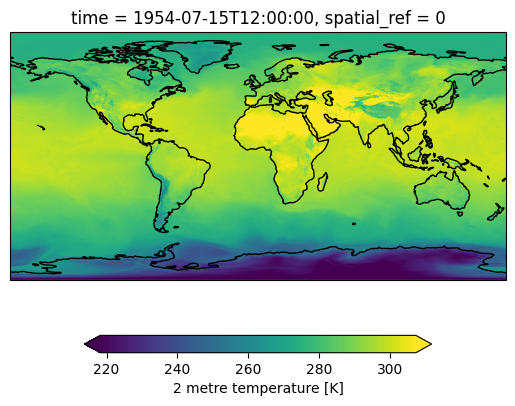

In [8]:
_, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
da.isel(t=0).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    x='lon', y='lat',
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,
)
axis.coastlines()  # cartopy function
plt.show()


# Subselecting regions

With latitudes and longitudes it is also possible to sub-select AOIs, with the where() method.

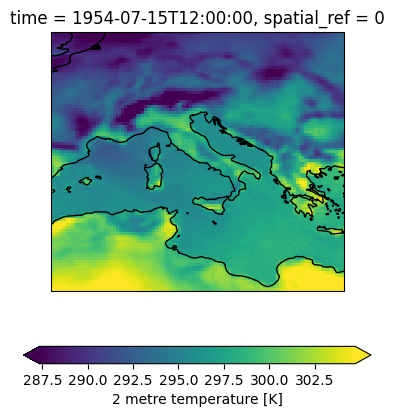

In [9]:
italy = [
    {
        'type': 'Polygon',
        'coordinates':     [[
            [-0.23850189831415491, 29.958695145158657],
            [26.009726989451195, 29.958695145158657],
            [26.009726989451195, 53.06909307850006],
            [-0.23850189831415491, 53.06909307850006],
            [-0.23850189831415491, 29.958695145158657]
        ]]
    }
]

_, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
da.isel(t=0).rio.clip(geometries=italy, drop=True).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),
    x='lon', y='lat',
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,
)
axis.coastlines()
plt.show()